In [1]:
! git clone https://github.com/dxli94/WLASL

Cloning into 'WLASL'...
remote: Enumerating objects: 216, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 216 (delta 17), reused 15 (delta 15), pack-reused 177
Receiving objects: 100% (216/216), 3.73 MiB | 624.00 KiB/s, done.
Resolving deltas: 100% (86/86), done.


In [2]:
def folder_size(path='.'):
    import os
    total = 0
    for entry in os.scandir(path):
        if entry.is_file():
            total += entry.stat().st_size
        elif entry.is_dir():
            total += folder_size(entry.path)
    return total


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
# Read json file:
import pandas as pd

df = pd.read_json('./WLASL/start_kit/WLASL_v0.3.json')

# Get full dataframe of data
inst_list = []

def make_df(row):
    gloss_df = pd.DataFrame(row['instances'])
    gloss_df['gloss'] = row['gloss']
    inst_list.append(gloss_df)

df.apply(make_df, axis=1)

full_df = inst_list[0]
for i in range(1, len(inst_list)):
    full_df = pd.concat([full_df, inst_list[i]], axis=0)

full_df.shape

(21083, 12)

In [11]:
full_df.head()

,bbox,fps,frame_end,frame_start,instance_id,signer_id,source,split,url,variation_id,video_id,gloss
0,"[385, 37, 885, 720]",25,-1,1,0,118,aslbrick,train,http://aslbricks.org/New/ASL-Videos/book.mp4,0,69241,book
1,"[190, 25, 489, 370]",25,-1,1,1,90,aslsignbank,train,https://aslsignbank.haskins.yale.edu/dictionar...,0,65225,book
2,"[262, 1, 652, 480]",25,-1,1,2,110,valencia-asl,train,https://www.youtube.com/watch?v=0UsjUE-TXns,0,68011,book
3,"[123, 19, 516, 358]",25,60,1,3,113,lillybauer,train,https://www.youtube.com/watch?v=1QOYOZ3g-aY,0,68208,book
4,"[95, 0, 1180, 720]",25,-1,1,4,109,valencia-asl,train,https://www.youtube.com/watch?v=aGtIHKEdCds,0,68012,book


In [12]:
#Gloss information:
full_df.groupby('gloss')['split'].count().reset_index().describe()

,split
count,2000.000000
mean,10.541500
std,3.547192
min,6.000000
25%,8.000000
50%,10.000000
75%,12.000000
max,40.000000


In [13]:
class_names = list(full_df['gloss'].unique())
class_names[:5]

['book', 'drink', 'computer', 'before', 'chair']

In [ ]:
# DownLoad dataset:
!gdown --id 11eFE_quM2_2-h3H_zTTjq0i0D6pkx62Z

Downloading...
From: https://drive.google.com/uc?id=11eFE_quM2_2-h3H_zTTjq0i0D6pkx62Z
To: /content/WLASL2000.zip
2.01GB [00:13, 149MB/s]


In [14]:
# Unzip:
!unzip -q ./data/WLASL2000.zip -d ./videos

In [15]:
# MAKE EACH CLASS FOLDER AND COPY FILES TO THEM
video_dir = './videos/WLASL2000'

import random, os, shutil

all_video_id = list(full_df['video_id'].values)

try:
    new_data_dir = './data'
    os.mkdir(new_data_dir)
except:
    pass

for cl_name in class_names:
    cl_dir = os.path.join(new_data_dir, cl_name)
    cl_df = full_df[full_df['gloss'] == cl_name]
    cl_all_video_id = list(cl_df['video_id'].values)
    cl_all_video_path = [os.path.join(video_dir, (video_id+'.mp4')) for video_id in cl_all_video_id] # .../01234.mp4
    
    # make class folder
    try:
        os.mkdir(cl_dir)
    except:
        pass

    # Copy image to class folder:
    for video_path in cl_all_video_path:
        try:
            shutil.copy(video_path, cl_dir)
        except:
            pass

In [16]:
# REMOVE EMPTY FOLDERS:
import os, shutil

def remove_empty_folders(path_abs):
    walk = list(os.walk(path_abs))
    for path, _, _ in walk[::-1]:
        if len(os.listdir(path)) == 0:
            # os.remove(path)
            shutil.rmtree(path)
            print(path)

remove_empty_folders('./data')

In [24]:
folder_size('./data')/1e6

4099.823272

In [ ]:
# COPY TO GG DRIVE:
from distutils.dir_util import copy_tree

source_dir = '/content/data'
destination_dir = '/content/drive/MyDrive/Colab Notebooks/Projects/ASL_final project/data_update'

copy_tree(source_dir, destination_dir, verbose=2)

# Working on ggdriver data

In [2]:
import pandas as pd

In [3]:
# Count files in classification folder:
data_dir = './data'

def get_class_element_count(data_dir): 
    import os 
    class_dict = {} 
    class_list = os.listdir(data_dir) 
    # check number of element inside each class folder: 
    for i in range(len(class_list)): 
        try:
            class_dir = os.path.join(data_dir, class_list[i]) 
            class_count = len(os.listdir(class_dir))
            # class_dict[class_list[i]] = class_count
            class_dict[class_list[i]] = []
            class_dict[class_list[i]].append(class_count)
        except Exception:
            pass
    return class_dict

data_df = pd.DataFrame(get_class_element_count(data_dir)).T
# .plot(kind = 'barh', figsize=(10,30))

In [4]:
data_df.describe()

,0
count,2000.000000
mean,10.541500
std,3.547192
min,6.000000
25%,8.000000
50%,10.000000
75%,12.000000
max,40.000000


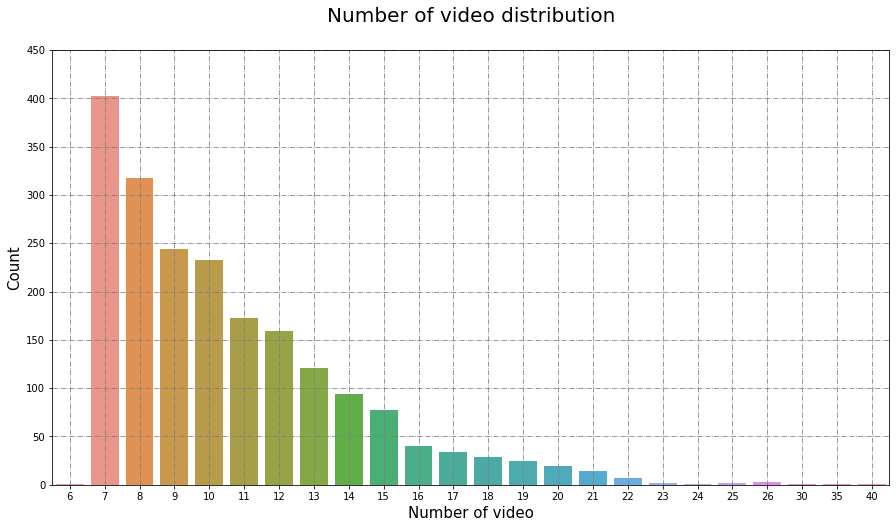

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.countplot(data=data_df, x = 0)
plt.yticks(ticks = range(0, 470, 50))
plt.title('Number of video distribution\n', fontsize = 20)
plt.grid(ls='-.', color='grey')
plt.xlabel('Number of video', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()